# Table of Contents
 <p>

In [1]:
%matplotlib inline
import math,sys,os,numpy as np
from numpy.random import random
from matplotlib import pyplot as plt, rcParams, animation, rc
from __future__ import print_function, division
from ipywidgets import interact, interactive, fixed
from ipywidgets.widgets import *
rc('animation', html='html5')
rcParams['figure.figsize'] = 3, 3
%precision 4
np.set_printoptions(precision=4, linewidth=100)

In [2]:
def lin(a,b,x): return a*x+b

In [3]:
a=3.
b=8.

In [4]:
n=30
x = random(n)
y = lin(a,b,x)

In [5]:
x

array([ 0.138 ,  0.6951,  0.9568,  0.0196,  0.7886,  0.1256,  0.9598,  0.7006,  0.9418,  0.2325,
        0.4877,  0.7501,  0.2404,  0.2493,  0.9447,  0.3555,  0.7508,  0.9758,  0.8138,  0.6557,
        0.952 ,  0.9711,  0.9619,  0.6475,  0.3561,  0.3163,  0.4549,  0.4619,  0.8252,  0.8968])

In [6]:
y

array([  8.4139,  10.0854,  10.8705,   8.0587,  10.3658,   8.3769,  10.8795,  10.1018,  10.8254,
         8.6976,   9.463 ,  10.2504,   8.7211,   8.748 ,  10.834 ,   9.0665,  10.2523,  10.9273,
        10.4413,   9.9671,  10.8559,  10.9134,  10.8858,   9.9426,   9.0683,   8.949 ,   9.3646,
         9.3857,  10.4755,  10.6904])

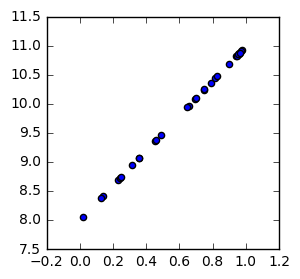

In [7]:
plt.scatter(x,y)

In [8]:
def sse(y,y_pred): return ((y-y_pred)**2).sum()
def loss(y,a,b,x): return sse(y, lin(a,b,x))
def avg_loss(y,a,b,x): return np.sqrt(loss(y,a,b,x)/n)

In [9]:
a_guess=-1.
b_guess=1.
avg_loss(y, a_guess, b_guess, x)

9.5596

In [10]:
lr=0.01
# d[(y-(a*x+b))**2,b] = 2 (b + a x - y)      = 2 (y_pred - y)
# d[(y-(a*x+b))**2,a] = 2 x (b + a x - y)    = x * dy/db

In [11]:
def upd():
    global a_guess, b_guess
    y_pred = lin(a_guess, b_guess, x)
    dydb = 2 * (y_pred - y)
    dyda = x*dydb
    a_guess -= lr*dyda.mean()
    b_guess -= lr*dydb.mean()

Install ffmpeg before running the following cell  
`sudo apt install ffmpeg`   
You'll have to restart the kernel before the last cell wil work once installed  

In [12]:
fig = plt.figure(dpi=100, figsize=(5, 4))
plt.scatter(x,y)
line, = plt.plot(x,lin(a_guess,b_guess,x))
plt.close()

def animate(i):
    line.set_ydata(lin(a_guess,b_guess,x))
    for i in range(10): upd()
    return line,

ani = animation.FuncAnimation(fig, animate, np.arange(0, 40), interval=100)
ani